# Import Libraries

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score , mean_squared_error

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor

# Explore Data


In [4]:
laptops = pd.read_csv("laptop_prices.csv")

In [5]:
laptops.head(5)

,Company,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenW,...,RetinaDisplay,CPU_company,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model
0,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1339.69,Standard,2560,...,Yes,Intel,2.3,Core i5,128,0,SSD,No,Intel,Iris Plus Graphics 640
1,Apple,Macbook Air,Ultrabook,13.3,8,macOS,1.34,898.94,Standard,1440,...,No,Intel,1.8,Core i5,128,0,Flash Storage,No,Intel,HD Graphics 6000
2,HP,250 G6,Notebook,15.6,8,No OS,1.86,575.00,Full HD,1920,...,No,Intel,2.5,Core i5 7200U,256,0,SSD,No,Intel,HD Graphics 620
3,Apple,MacBook Pro,Ultrabook,15.4,16,macOS,1.83,2537.45,Standard,2880,...,Yes,Intel,2.7,Core i7,512,0,SSD,No,AMD,Radeon Pro 455
4,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1803.60,Standard,2560,...,Yes,Intel,3.1,Core i5,256,0,SSD,No,Intel,Iris Plus Graphics 650


In [6]:
laptops.shape

(1275, 23)

In [7]:
laptops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Company               1275 non-null   object 
 1   Product               1275 non-null   object 
 2   TypeName              1275 non-null   object 
 3   Inches                1275 non-null   float64
 4   Ram                   1275 non-null   int64  
 5   OS                    1275 non-null   object 
 6   Weight                1275 non-null   float64
 7   Price_euros           1275 non-null   float64
 8   Screen                1275 non-null   object 
 9   ScreenW               1275 non-null   int64  
 10  ScreenH               1275 non-null   int64  
 11  Touchscreen           1275 non-null   object 
 12  IPSpanel              1275 non-null   object 
 13  RetinaDisplay         1275 non-null   object 
 14  CPU_company           1275 non-null   object 
 15  CPU_freq             

In [8]:
laptops.describe()

,Inches,Ram,Weight,Price_euros,ScreenW,ScreenH,CPU_freq,PrimaryStorage,SecondaryStorage
count,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000
mean,15.022902,8.440784,2.040525,1134.969059,1900.043922,1073.904314,2.302980,444.517647,176.069020
std,1.429470,5.097809,0.669196,700.752504,493.346186,283.883940,0.503846,365.537726,415.960655
min,10.100000,2.000000,0.690000,174.000000,1366.000000,768.000000,0.900000,8.000000,0.000000
25%,14.000000,4.000000,1.500000,609.000000,1920.000000,1080.000000,2.000000,256.000000,0.000000
50%,15.600000,8.000000,2.040000,989.000000,1920.000000,1080.000000,2.500000,256.000000,0.000000
75%,15.600000,8.000000,2.310000,1496.500000,1920.000000,1080.000000,2.700000,512.000000,0.000000
max,18.400000,64.000000,4.700000,6099.000000,3840.000000,2160.000000,3.600000,2048.000000,2048.000000


In [9]:
for i in laptops.columns:
    print(f"Number of unique value in {i} is : {laptops[i].nunique()}")

Number of unique value in Company is : 19
Number of unique value in Product is : 618
Number of unique value in TypeName is : 6
Number of unique value in Inches is : 18
Number of unique value in Ram is : 9
Number of unique value in OS is : 9
Number of unique value in Weight is : 171
Number of unique value in Price_euros is : 791
Number of unique value in Screen is : 4
Number of unique value in ScreenW is : 13
Number of unique value in ScreenH is : 10
Number of unique value in Touchscreen is : 2
Number of unique value in IPSpanel is : 2
Number of unique value in RetinaDisplay is : 2
Number of unique value in CPU_company is : 3
Number of unique value in CPU_freq is : 25
Number of unique value in CPU_model is : 93
Number of unique value in PrimaryStorage is : 13
Number of unique value in SecondaryStorage is : 6
Number of unique value in PrimaryStorageType is : 4
Number of unique value in SecondaryStorageType is : 4
Number of unique value in GPU_company is : 4
Number of unique value in GPU_

In [10]:
# Check Missing Values
laptops.isnull().sum().sum()

0

In [11]:
# Check Duplicated Values
laptops.duplicated().sum()

0

# Data Analysis and Visualization

array([[<Axes: title={'center': 'Inches'}>,
        <Axes: title={'center': 'Ram'}>,
        <Axes: title={'center': 'Weight'}>],
       [<Axes: title={'center': 'Price_euros'}>,
        <Axes: title={'center': 'ScreenW'}>,
        <Axes: title={'center': 'ScreenH'}>],
       [<Axes: title={'center': 'CPU_freq'}>,
        <Axes: title={'center': 'PrimaryStorage'}>,
        <Axes: title={'center': 'SecondaryStorage'}>]], dtype=object)

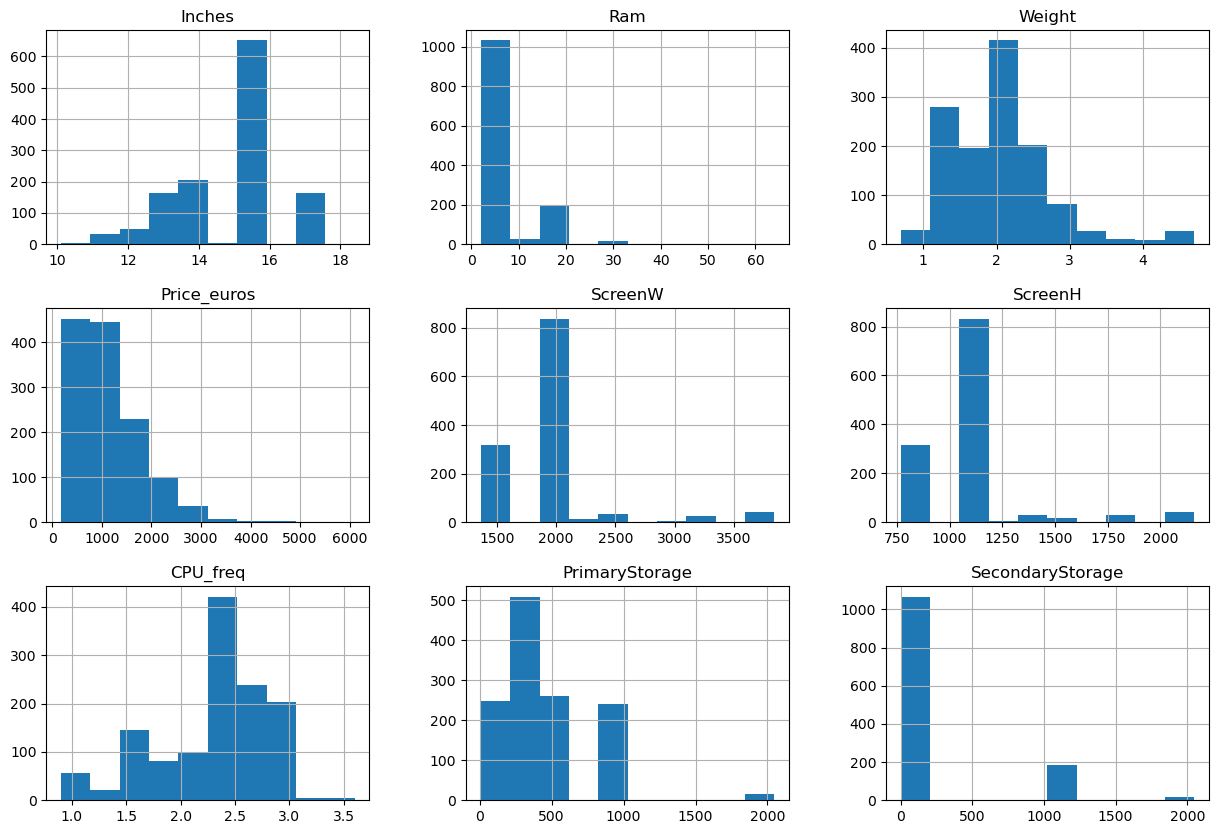

In [13]:
laptops.hist(figsize = (15,10))

In [15]:
top_laptops = laptops["Company"].value_counts()
top_laptops

Company
Dell         291
Lenovo       289
HP           268
Asus         152
Acer         101
MSI           54
Toshiba       48
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: count, dtype: int64

<Axes: xlabel='Company'>

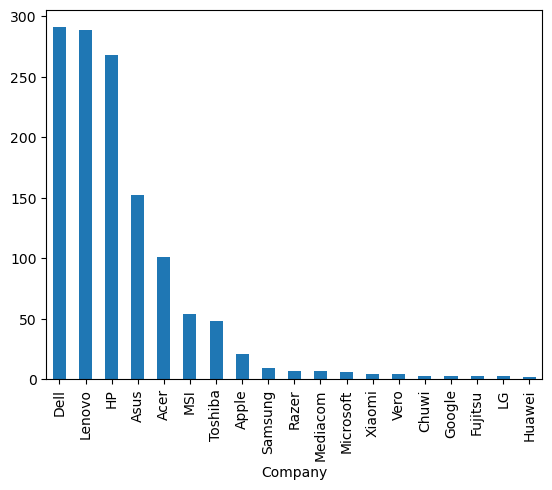

In [16]:
top_laptops.plot(kind = "bar")

In [17]:
# Laptops Mean Price and Visualize this 
topmeanprice =[laptops[laptops["Company"] == i]["Price_euros"].mean() for i in list(top_laptops.index)]
topmeanprice

[1199.2251202749142,
 1093.8622145328723,
 1080.3146641791045,
 1123.8297368421051,
 633.4644554455446,
 1728.9081481481483,
 1267.8125,
 1564.1985714285713,
 1413.4444444444443,
 3346.1428571428573,
 295.0,
 1612.3083333333334,
 1133.4625,
 217.425,
 314.2966666666667,
 1677.6666666666667,
 729.0,
 2099.0,
 1424.0]

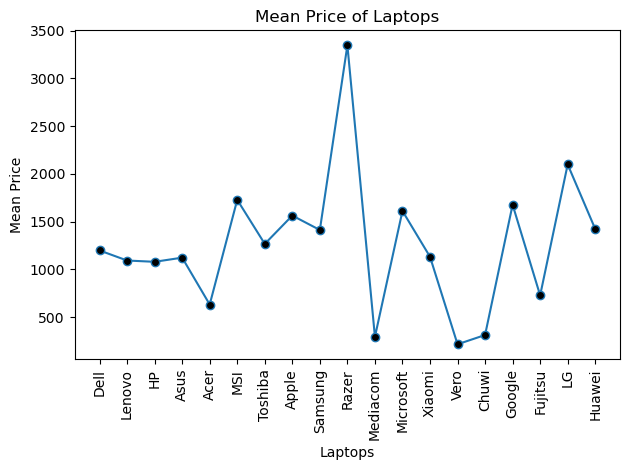

In [18]:
plt.plot(top_laptops.index , topmeanprice , marker ="o" ,mfc = "black" )
plt.xlabel("Laptops")
plt.ylabel("Mean Price")
plt.title("Mean Price of Laptops")
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

In [20]:
# Visualize all Object features
ob = laptops.select_dtypes(include = object)

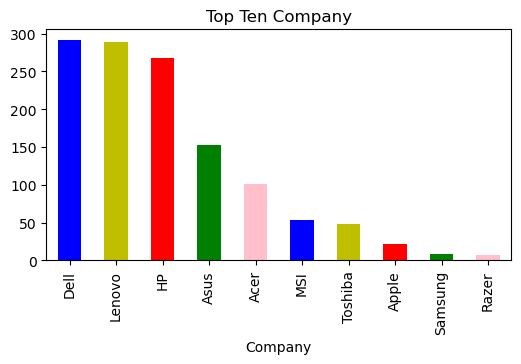

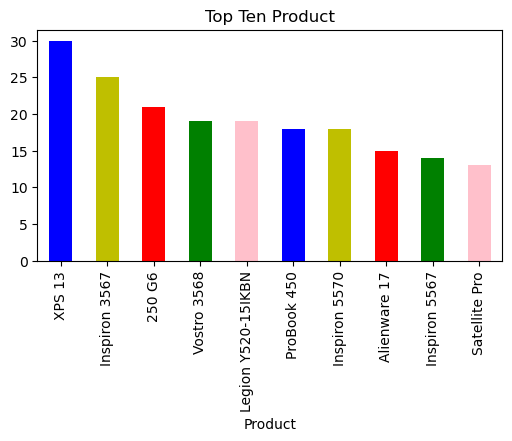

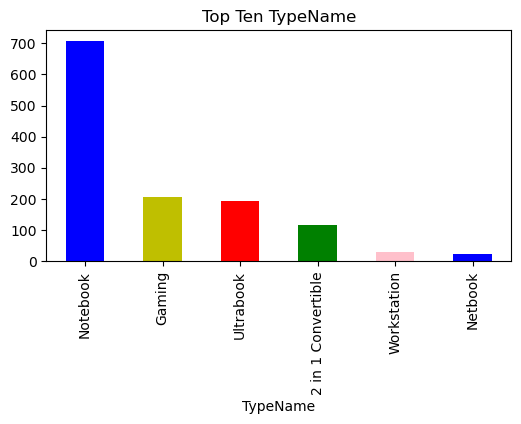

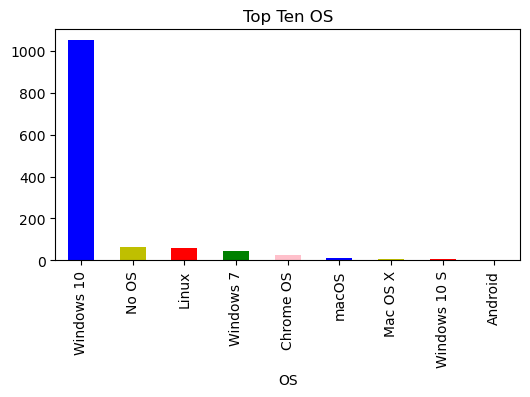

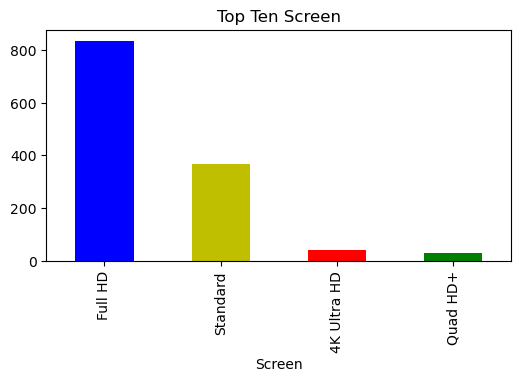

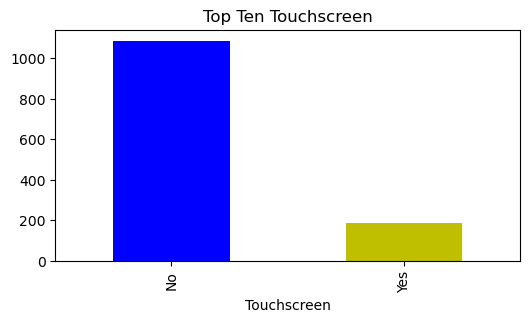

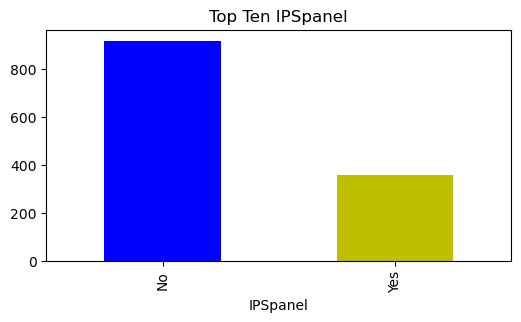

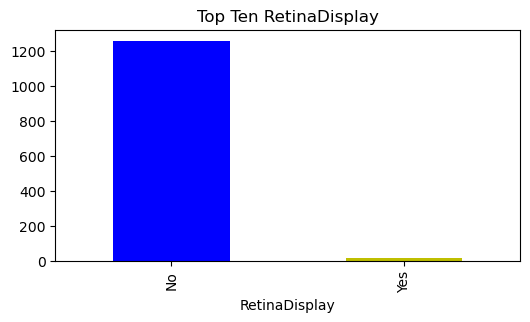

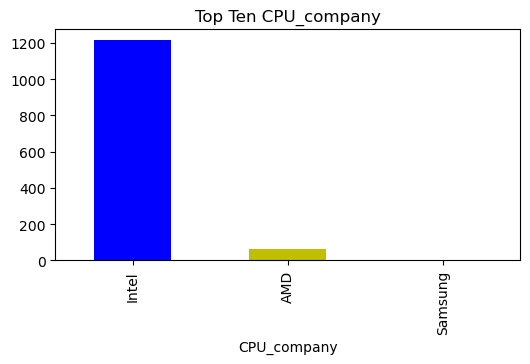

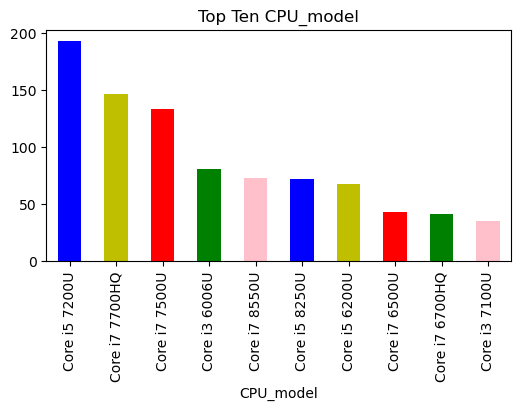

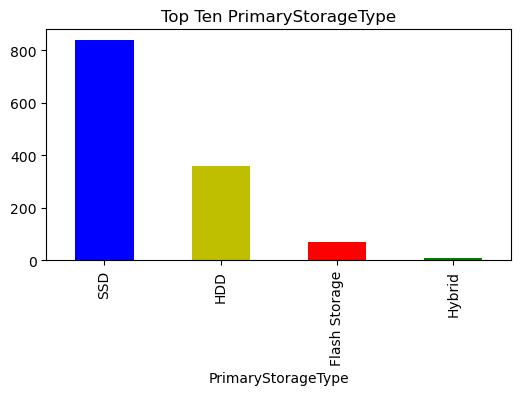

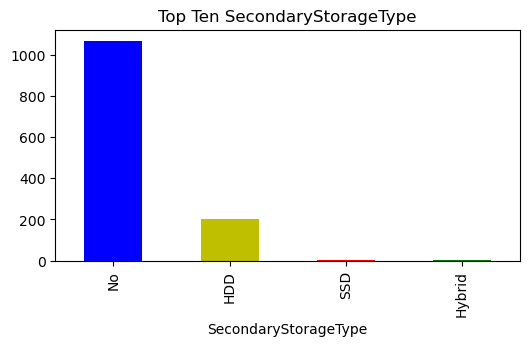

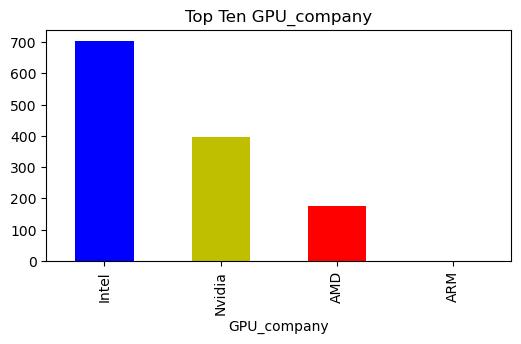

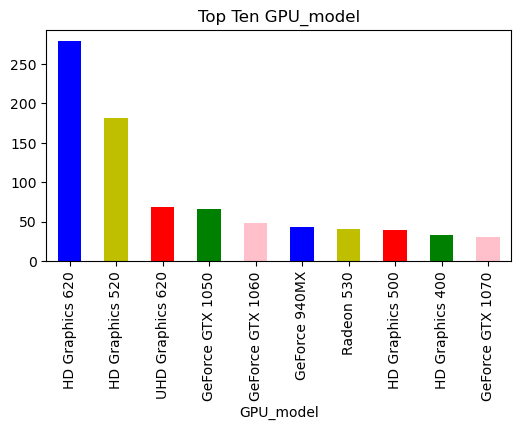

In [21]:
for i in ob:
    top = laptops[i].value_counts().head(10)
    c = ["b" , "y" , "r" , "g" , "pink"]
    plt.figure(figsize=(6,3))
    top.plot(kind = "bar" , color = c)
    plt.title("Top Ten " + i)

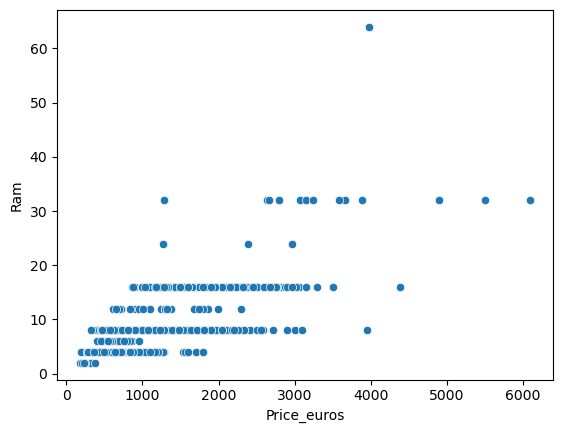

In [22]:
sns.scatterplot(x ="Price_euros" ,y="Ram" , data = laptops)
plt.show()

# Build Model

In [24]:
non_ob = laptops.select_dtypes(exclude = object)
ob = laptops.select_dtypes(include = object)

In [25]:
ob.head(5)

,Company,Product,TypeName,OS,Screen,Touchscreen,IPSpanel,RetinaDisplay,CPU_company,CPU_model,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model
0,Apple,MacBook Pro,Ultrabook,macOS,Standard,No,Yes,Yes,Intel,Core i5,SSD,No,Intel,Iris Plus Graphics 640
1,Apple,Macbook Air,Ultrabook,macOS,Standard,No,No,No,Intel,Core i5,Flash Storage,No,Intel,HD Graphics 6000
2,HP,250 G6,Notebook,No OS,Full HD,No,No,No,Intel,Core i5 7200U,SSD,No,Intel,HD Graphics 620
3,Apple,MacBook Pro,Ultrabook,macOS,Standard,No,Yes,Yes,Intel,Core i7,SSD,No,AMD,Radeon Pro 455
4,Apple,MacBook Pro,Ultrabook,macOS,Standard,No,Yes,Yes,Intel,Core i5,SSD,No,Intel,Iris Plus Graphics 650


In [26]:
la = LabelEncoder()
for i in range(0 , ob.shape[1]):
    ob.iloc[: , i] = la.fit_transform(ob.iloc[: ,i])

In [27]:
ob =ob.astype(int)

In [28]:
ob.head(5)

,Company,Product,TypeName,OS,Screen,Touchscreen,IPSpanel,RetinaDisplay,CPU_company,CPU_model,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model
0,1,300,4,8,3,0,1,1,1,40,3,2,2,60
1,1,301,4,8,3,0,0,0,1,40,0,2,2,53
2,7,50,3,4,1,0,0,0,1,46,3,2,2,55
3,1,300,4,8,3,0,1,1,1,54,3,2,0,80
4,1,300,4,8,3,0,1,1,1,40,3,2,2,61


In [29]:
ob.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Company               1275 non-null   int32
 1   Product               1275 non-null   int32
 2   TypeName              1275 non-null   int32
 3   OS                    1275 non-null   int32
 4   Screen                1275 non-null   int32
 5   Touchscreen           1275 non-null   int32
 6   IPSpanel              1275 non-null   int32
 7   RetinaDisplay         1275 non-null   int32
 8   CPU_company           1275 non-null   int32
 9   CPU_model             1275 non-null   int32
 10  PrimaryStorageType    1275 non-null   int32
 11  SecondaryStorageType  1275 non-null   int32
 12  GPU_company           1275 non-null   int32
 13  GPU_model             1275 non-null   int32
dtypes: int32(14)
memory usage: 69.9 KB


In [30]:
Laptops = pd.concat([ob,non_ob] , axis =1)

In [31]:
Laptops.head(5)

,Company,Product,TypeName,OS,Screen,Touchscreen,IPSpanel,RetinaDisplay,CPU_company,CPU_model,...,GPU_model,Inches,Ram,Weight,Price_euros,ScreenW,ScreenH,CPU_freq,PrimaryStorage,SecondaryStorage
0,1,300,4,8,3,0,1,1,1,40,...,60,13.3,8,1.37,1339.69,2560,1600,2.3,128,0
1,1,301,4,8,3,0,0,0,1,40,...,53,13.3,8,1.34,898.94,1440,900,1.8,128,0
2,7,50,3,4,1,0,0,0,1,46,...,55,15.6,8,1.86,575.00,1920,1080,2.5,256,0
3,1,300,4,8,3,0,1,1,1,54,...,80,15.4,16,1.83,2537.45,2880,1800,2.7,512,0
4,1,300,4,8,3,0,1,1,1,40,...,61,13.3,8,1.37,1803.60,2560,1600,3.1,256,0


In [32]:
x=Laptops.drop(["Price_euros"],axis = 1)
y=Laptops["Price_euros"]

In [33]:
x

,Company,Product,TypeName,OS,Screen,Touchscreen,IPSpanel,RetinaDisplay,CPU_company,CPU_model,...,GPU_company,GPU_model,Inches,Ram,Weight,ScreenW,ScreenH,CPU_freq,PrimaryStorage,SecondaryStorage
0,1,300,4,8,3,0,1,1,1,40,...,2,60,13.3,8,1.37,2560,1600,2.3,128,0
1,1,301,4,8,3,0,0,0,1,40,...,2,53,13.3,8,1.34,1440,900,1.8,128,0
2,7,50,3,4,1,0,0,0,1,46,...,2,55,15.6,8,1.86,1920,1080,2.5,256,0
3,1,300,4,8,3,0,1,1,1,54,...,0,80,15.4,16,1.83,2880,1800,2.7,512,0
4,1,300,4,8,3,0,1,1,1,40,...,2,61,13.3,8,1.37,2560,1600,3.1,256,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1270,10,580,0,5,1,1,1,0,1,55,...,2,49,14.0,4,1.80,1920,1080,2.5,128,0
1271,10,588,0,5,2,1,1,0,1,55,...,2,49,13.3,16,1.30,3200,1800,2.5,512,0
1272,10,196,3,5,3,0,0,0,1,20,...,2,42,14.0,2,1.50,1366,768,1.6,64,0
1273,7,2,3,5,3,0,0,0,1,55,...,0,92,15.6,6,2.19,1366,768,2.5,1024,0


In [34]:
y

0       1339.69
1        898.94
2        575.00
3       2537.45
4       1803.60
         ...   
1270     638.00
1271    1499.00
1272     229.00
1273     764.00
1274     369.00
Name: Price_euros, Length: 1275, dtype: float64

In [35]:
x_train,x_test,y_train,y_test = train_test_split(x , y , test_size = 0.2 , shuffle =True ,random_state = 42 )

In [36]:
print(x_train.shape,x_test.shape)

(1020, 22) (255, 22)


In [37]:
model_LR = LinearRegression()
model_RF = RandomForestRegressor(n_estimators = 100 )
model_SVC = SVR()
model_XGB = XGBRegressor()
model_GBOOSTING = GradientBoostingRegressor()
model_DT = DecisionTreeRegressor()

In [38]:
model_LR.fit(x_test ,y_test)
predict = model_LR.predict(x_test)
print(r2_score(predict , y_test))
print(mean_squared_error(predict, y_test))

0.680081164267078
120301.55083358152


In [39]:
Algo=['LinearRegression','RandomForestRegressor','SVR','XGBRegressor',
      'GradientBoostingRegressor','DecisionTreeRegressor']
R2=[]
RMSE =[]

In [40]:
def predict(model):
    model.fit(x_train ,y_train)
    prediction = model.predict(x_test)
    r2=r2_score(prediction , y_test)
    R2.append(r2)
    rsme = mean_squared_error(prediction , y_test)
    RMSE.append(rsme)
    score = model.score(x_test,y_test)
    print(f"Score of {model} is : {score}")

In [41]:
predict(model_LR)
predict(model_RF)
predict(model_SVC)
predict(model_XGB)
predict(model_GBOOSTING)
predict(model_DT)

Score of LinearRegression() is : 0.7417518679812346
Score of RandomForestRegressor() is : 0.8770789037147813
Score of SVR() is : -0.03560604001356893
Score of XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...) is : 0.8957095849295009
Score of GradientBoostingRegressor() is : 0.8938741108512187
Score of 

In [42]:
pd.DataFrame({"Algorithm" : Algo , "R2_Score" : R2 , "RMSE" : RMSE})

,Algorithm,R2_Score,RMSE
0,LinearRegression,0.577579,128178.690557
1,RandomForestRegressor,0.850279,61010.567784
2,SVR,-466.267579,514011.950848
3,XGBRegressor,0.891207,51763.428982
4,GradientBoostingRegressor,0.879224,52674.446854
5,DecisionTreeRegressor,0.759253,115867.503555
